In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

In [2]:
from imp import reload
import mdfmodels

In [3]:
fehs = np.linspace(-5, 1, 100)

## Leaky Box

In [4]:
parr = [0.001, 0.01, 0.1, 1]

(0.9999999999990001, 6.884261181407635e-11)
(0.9999999999999001, 1.7766336335341194e-09)
(0.99999999999999, 2.616599026379098e-09)
(0.9999999999999992, 3.048936791686831e-11)


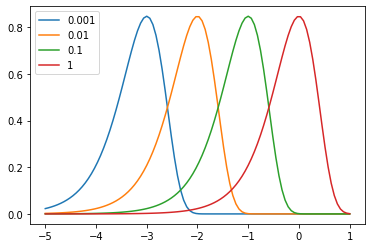

In [5]:
for p in parr:
    dndfeh = mdfmodels.leaky_box(fehs, p)
    plt.plot(fehs, dndfeh, label=str(p))
    print(integrate.quad(lambda x: mdfmodels.leaky_box(x,p), -15, 10))
plt.legend()

## Pre-Enriched

0.9999998870584312
0.9999995829267949
0.9999859626653428
0.9999017032829424
0.9999999887676053
0.9999999597355278
0.9999988301506075
0.9999949937983013
0.9999545284523391
0.999954487533219
0.9999540904461702
0.99995175223621


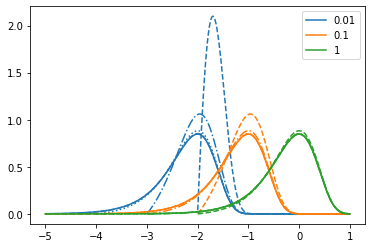

In [6]:
reload(mdfmodels)
fehs = np.linspace(-5,1,1000)
parr = [0.01, 0.1, 1]
feh0arr = [-5, -4, -3, -2]
lsarr = ['--',':','-.','--']
for p in parr:
    dndfeh = mdfmodels.leaky_box(fehs, p)
    l, = plt.plot(fehs, dndfeh, label=str(p))
    color = l.get_color()
    for feh0, ls in zip(feh0arr, lsarr):
        ii = fehs > feh0
        dndfeh = mdfmodels.pre_enriched_box(fehs, p, feh0)
        plt.plot(fehs[ii], dndfeh[ii], ls=ls, color=color)
        print(integrate.trapz(dndfeh[ii], fehs[ii]))
plt.legend()

## Extra Gas

In [7]:
reload(mdfmodels)
p = 0.01
M = 1
%time mdfmodels._extra_gas_compute_func_norm(p,M)

CPU times: user 198 ms, sys: 3.68 ms, total: 201 ms
Wall time: 199 ms


/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))


(<scipy.interpolate.interpolate.interp1d at 0x117c7c9f8>, 0.4338604004862114)

/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))


CPU times: user 217 ms, sys: 7.24 ms, total: 225 ms
Wall time: 219 ms


/Users/alexji/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


(-30.0, 0.0)

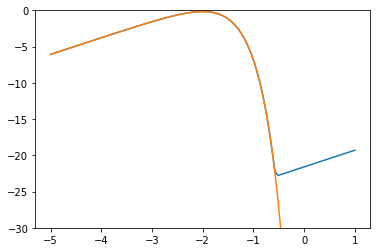

In [8]:
p = 0.01
M = 1
fehs = np.linspace(-5, 1, 100)
%time dndfeh = mdfmodels.extra_gas(fehs, p, M)
plt.plot(fehs, np.log(dndfeh))
plt.plot(fehs, np.log(mdfmodels.leaky_box(fehs,p)))
plt.ylim(-30,0)

So there will be some numerical problems at the right end of the PDF. Will look into the details another day... I think it has to do with accuracy of solving for s as it gets very close to 1.

/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))


1.000011179990256


/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))


1.000015528302427
1.0000183869577486


/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))


1.000020457059779


/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))
/Users/alexji/lib/python/mdfmodels/mdfmodels/mdfmodels.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log10(p) + 2*np.log10(M) - 2*np.log10(1+s-sM) + np.log10(-np.log(1-sM) - sM * (1-1/M))


1.0000220347847661


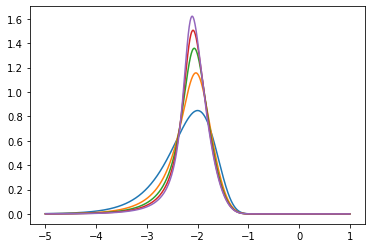

In [9]:
fehs = np.linspace(-5, 1, 1000)
p = 0.01
for M in [1, 2, 3, 4, 5]:
    dndfeh = mdfmodels.extra_gas(fehs, p, M)
    plt.plot(fehs, dndfeh, label=str(M))
    print(integrate.trapz(dndfeh, fehs))